In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error  #importing basic things
from math import sqrt

In [2]:
from statsmodels.graphics.tsaplots import plot_acf  #autocorrelation function plot autocorrelation is basically our signal and our signal with a time lag and ur place these signals on top of one another
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA #arima model

In [3]:
df = pd.read_csv('Oil_1_dataset1.csv', parse_dates=True, index_col=[0])
df.head()

,Demand
Date,
2019-01-07,3500
2019-02-07,5000
2019-03-07,2000
2019-04-07,500
2019-05-07,350


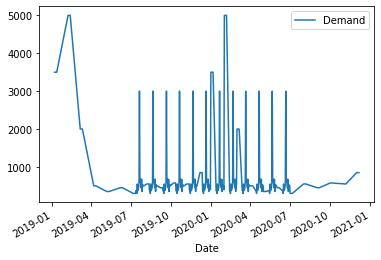

In [4]:
df.plot()
plt.show()

In [5]:
demand_diff = df.diff(periods=30)
demand_diff = demand_diff[30:]
demand_diff.head()

,Demand
Date,
2019-07-31,-3000.0
2019-01-08,-1500.0
2019-02-08,3000.0
2019-03-08,1500.0
2019-04-08,150.0


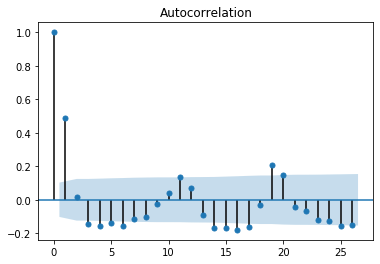

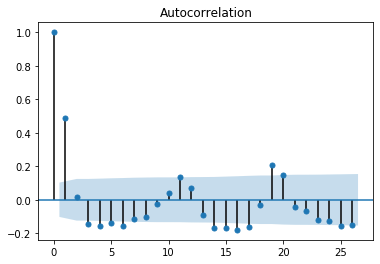

In [6]:
plot_acf(df.values)

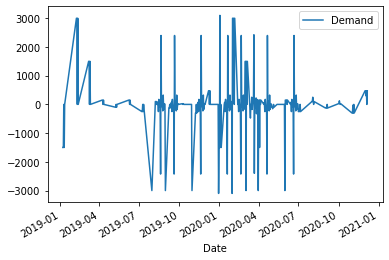

In [7]:
demand_diff.plot()

In [8]:
X = df.values
train1 = X[0:336]
test1 = X[336:]
X.shape

(366, 1)

In [24]:
model_arima = ARIMA(train1,order=(25,1,1))

In [25]:
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

5433.2113522360505


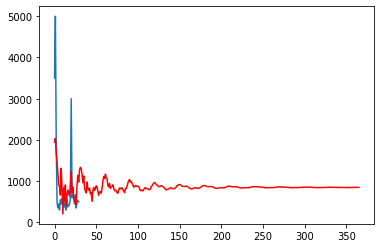

In [26]:
y_pred1 = model_arima_fit.forecast(steps=366)[0].tolist()
plt.plot(test1)
plt.plot(y_pred1 , color = 'red')

In [27]:
y_pred1

[1949.0594918550592,
 2038.5540979292196,
 1683.5054877023895,
 1457.1407924742366,
 1183.0267382723375,
 917.8643289475544,
 863.5908100355598,
 661.7465590658655,
 1313.1951857764407,
 813.6096180426032,
 205.65824689721262,
 830.0838554739332,
 533.9636273162596,
 909.4077257001288,
 403.37530878304676,
 651.8605841275073,
 783.0518132967558,
 725.075601518502,
 641.9008538982534,
 906.8818309665637,
 1227.05480666802,
 730.3970072243937,
 857.570501973744,
 622.3121429961743,
 600.331684661015,
 454.1150910997319,
 431.0643135665909,
 922.5109652990085,
 1141.3120784258936,
 977.5507305360186,
 1279.0344767159486,
 1335.4426135804385,
 1303.8688616405673,
 1161.0419672378287,
 961.9687607459666,
 1126.712148567647,
 837.343129910196,
 763.4377035709379,
 715.979197621642,
 981.6546330359322,
 815.0528249737068,
 780.3278011447971,
 833.0179799361216,
 695.685175343272,
 726.6551555416833,
 511.09513581889826,
 769.3568265924009,
 851.1982465211097,
 775.3431717855271,
 821.10538735

In [28]:
import pickle

In [29]:
filename='model_oil.pkl'
pickle.dump(model_arima_fit, open(filename, 'wb'))

In [30]:
model = pickle.load(open(filename, 'rb'))